In [4]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/autoSSL/autoSSL")
import torchvision
from lightly.data import LightlyDataset, SimCLRCollateFunction, collate
import numpy as np
import tqdm
import yaml
import numpy as np
import torch
from tqdm import tqdm
import pytorch_lightning as pl
from IPython.display import clear_output
from torchvision import transforms
from torchvision.transforms import RandomRotation,GaussianBlur,ColorJitter


from torchvision.transforms import RandomRotation,GaussianBlur,ColorJitter
from autoSSL.evaluate import eval_KNN,eval_linear,eval_KNNplot,pipe_collate
from autoSSL.models import BarlowTwins, BYOL, MoCo, SimCLR, SimSiam, VICReg ,pipe_model 
from autoSSL.utils import embedding_feature,ck_callback,dict2transformer,join_dir,ContinuousCSVLogger  
from autoSSL.data import PipeDataset
from autoSSL.train import Trainer
import pytorch_lightning as pl



# 1 Test Config

In [5]:
# Load the YAML file
with open('experiment/global.yaml', 'r') as file:
    config = yaml.safe_load(file)

 
# Define global view function
SSL_augmentation = {
    'RandomResizedCrop': {'size': (config["input_size"], config["input_size"])},
    'RandomApply':{'transforms':[RandomRotation(degrees=90)], 'p':0.8},
    'RandomHorizontalFlip': {'p': 0.5},
    'RandomVerticalFlip':  {'p':0.5},
    'RandomApply':{'transforms': [ColorJitter(brightness=0.04,contrast=0.04,saturation=0.02,hue=0.01)], 'p':0.8},
    'RandomGrayscale' :{'p':0.2},
    'RandomSolarize':{'threshold':128, 'p':0.1},
    'RandomApply':{'transforms':[GaussianBlur(kernel_size=3,sigma=(0.2, 2))],'p':0.8},
    'ToTensor': {},
    'Normalize': {"mean": [0.485, 0.456, 0.406], "std": [0.229, 0.224, 0.225]}
}


#pl.seed_everything(seed)
finetuning_augmentation = {
    'RandomCrop': {'size': config["input_size"], 'padding': 4},
    'RandomHorizontalFlip': {},
    'ToTensor': {},
    'Normalize': {
        'mean': collate.imagenet_normalize["mean"],
        'std': collate.imagenet_normalize["std"]
    }
}
test_augmentation = {
    'ToTensor': {},
    'Normalize': {
        'mean': collate.imagenet_normalize["mean"],
        'std': collate.imagenet_normalize["std"]
    }
}

### Test dict2transformer Function



In [5]:
views=[1,2,4,10]

for view in  views:
    dict2transformer(SSL_augmentation,view=view)


# 1 Test Dataset

### Test 2 views Augmentation of SSL

.pipe_data :10000
.dataset :10000


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.14s/it]


.array :3
.array[0] :2


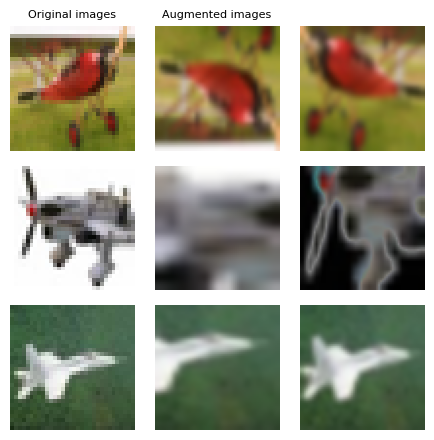

In [6]:


input_dirs=[config["path_to_train_cifar10"],config["path_to_test_cifar10"],config["path_to_train_imagenet-mini"],
            config["path_to_test_imagenet-mini"],config["path_to_data_sentinel"],config["dataset_dir"]]
sampless=[10,1000,10000,100000,-1]
batch_sizes=[1,1000,10000,100000]
shuffles=[True, False]
drop_lasts=[True, False]
num_workerss=[1,2,4,11]

pipe_data_test =PipeDataset(
    input_dir=input_dirs[0], 
    augmentation=dict2transformer(SSL_augmentation,view=2), 
    samples=sampless[2], 
    batch_size=batch_sizes[1], 
    shuffle=shuffles[0],
    drop_last=drop_lasts[0],
    num_workers=num_workerss[0],    
)


pipe_data_test.plot([2,3,4])

print(f".pipe_data :{len(pipe_data_test)}")     # get dataset class
pipe_data_test[2]

pipe_data_test.dataloader  # get dataloader  
print(f".dataset :{len(pipe_data_test.dataset)}")     # get dataset class
temp=pipe_data_test.array
print(f".array :{len(temp)}")       #get array.
print(f".array[0] :{len(temp[0])}")       #get array.

#clear_output()

### Test PipeDataset of different view

.pipe_data :1000
.dataset :1000


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:06<00:00,  4.66it/s]

.array :3
.array[0] :3


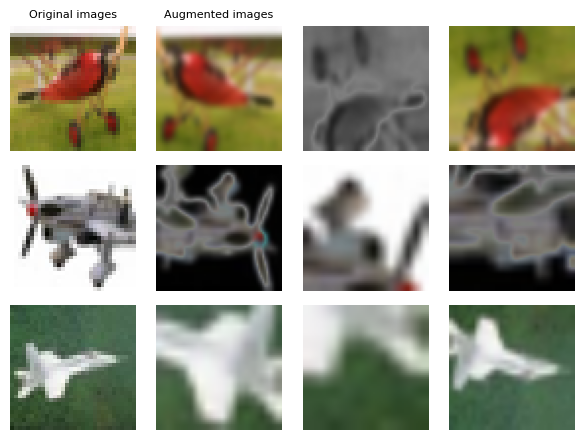

In [8]:
 pipe_data_test =PipeDataset(
    input_dir=config["path_to_train_cifar10"], 
    augmentation=dict2transformer(SSL_augmentation,view=3), 
    samples=1000, 
    batch_size=32, 
    shuffle=False,
    drop_last=False,
    num_workers=4,    
 
)

pipe_data_test.plot([2,3,4])

print(f".pipe_data :{len(pipe_data_test)}")     # get dataset class
pipe_data_test[2]

pipe_data_test.dataloader  # get dataloader  
print(f".dataset :{len(pipe_data_test.dataset)}")     # get dataset class
temp=pipe_data_test.array
print(f".array :{len(temp)}")       #get array.
print(f".array[0] :{len(temp[0])}")       #get array.

#clear_output()

### Test Split

In [12]:

train_pipe_dataset, val_pipe_dataset = pipe_data_test.split(0.8)

print(len(val_pipe_dataset))
print(len(train_pipe_dataset))
print(len(pipe_data_test))

200
800
1000


# 2 Test Model

### Test Candidate ALL

In [17]:
# Create a list of all the backbone names
backbones =  ["resnet18", "resnet18_pretrained", "resnet50", "resnet50_pretrained", 
             "efficientnet_b5", "efficientnet_b5_pretrained", "mobilenet_v3", 
             "mobilenet_v3_pretrained", "vit_64", "vit_224"]

# List of model names
model_list = ["MoCo", "BYOL", "SimCLR", "SimSiam", "BarlowTwins", "VICReg"]

# Image sizes
image_sizes = [64, 224]

# Parameters
stop_gradients = [False, True]
prjhead_dims = [None, 512, 1024]


In [19]:
# Create a list of all the backbone names
backbones = ["vit_224","efficientnet_b5_pretrained" ]

# List of model names
model_list = ["BarlowTwins", "VICReg"]

# Image sizes
image_sizes = [64, 224]

# Parameters
stop_gradients = [False, True]
prjhead_dims = [None, 512]


### Test Case
        

In [ ]:

# For each backbone name in the list
for backbone_name in backbones:
    # Pass the appropriate input image to each model and calculate the output
    for model_name in model_list:
        for img_size in image_sizes:
            for stop_gradient in stop_gradients:
                for prjhead_dim in prjhead_dims:
                    if (backbone_name == "vit_224" and img_size != 224) or (backbone_name == "vit_64" and img_size != 64):
                        print(f"Backbone: {backbone_name} not compatiable with Image Size: {img_size}")
                        continue
                    image = torch.randn(32, 3, img_size, img_size)  # Assuming RGB image
                    model = pipe_model(name=model_name, backbone=backbone_name, stop_gradient=stop_gradient, prjhead_dim=prjhead_dim)
                    output = model(image)
                    # Print the output size
                    if model_name=="SimSiam":
                        print(f"Model: {model_name}, Backbone: {backbone_name}, Image Size: {img_size}, Stop Gradient: {stop_gradient}, Projection Head Dimension: {prjhead_dim}, Output1 shape: {output[0].shape}, Output2 shape: {output[1].shape}") 
                    else:
                        print(f"Model: {model_name}, Backbone: {backbone_name}, Image Size: {img_size}, Stop Gradient: {stop_gradient}, Projection Head Dimension: {prjhead_dim}, Output shape: {output.shape}")


# Test Evaluation

#### Test on one models

In [22]:
# Define global view function
test_augmentation = {
    'RandomResizedCrop': {'size': (64, 64)},
    'ToTensor': {},
    'Normalize': {"mean": [0.485, 0.456, 0.406], "std": [0.229, 0.224, 0.225]}
}

pipe_data_test =PipeDataset(
    input_dir="Datasets/cifar10/test/", 
    samples=1000, 
    augmentation=dict2transformer(test_augmentation), 
    batch_size=32,
    shuffle=True,
    #collate_fn=collate_fn,
    drop_last=True,
    num_workers=4,

) 
model=MoCo()
eval_linear(pipe_data_test,models=model,split=0.8,device="cuda")  
#eval_linear(pipe_data_train,embedding_model=model,test=pipe_data_test,device="cuda") 
#eval_KNN(pipe_data_train,embedding_model=model,split=0.8,device="cuda") 
#eval_KNN(pipe_data_train,embedding_model=model,test=pipe_data_test,device="cuda")   
#eval_KNNplot(pipe_data_test,embedding_model=model,samples=2,device="cuda")

Load the training and testing dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.45it/s]


[('model_0', 0.125)]

#### Test on many models

In [10]:
# Define global view function
test_augmentation = {
    'RandomResizedCrop': {'size': (64, 64)},
    'ToTensor': {},
    'Normalize': {"mean": [0.485, 0.456, 0.406], "std": [0.229, 0.224, 0.225]}
}

pipe_data_test =PipeDataset(
    input_dir="Datasets/cifar10/test/", 
    samples=1000, 
    augmentation=dict2transformer(test_augmentation), 
    batch_size=32,
    shuffle=True,
    #collate_fn=collate_fn,
    drop_last=True,
    num_workers=4,

) 
model=MoCo()
eval_linear(pipe_data_test,models=[model,model,model],split=0.8,device="cuda")  
#eval_linear(pipe_data_train,embedding_model=model,test=pipe_data_test,device="cuda") 
#eval_KNN(pipe_data_train,embedding_model=model,split=0.8,device="cuda") 
#eval_KNN(pipe_data_train,embedding_model=model,test=pipe_data_test,device="cuda")   
#eval_KNNplot(pipe_data_test,embedding_model=model,samples=2,device="cuda")



Load the training and testing dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.17it/s]


[('model_0', 0.09895833333333333),
 ('model_1', 0.09375),
 ('model_2', 0.09895833333333333)]

#### Evaluate by KNN

Load the testing dataset to array


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:06<00:00,  4.61it/s]


embedding the test dataset
ship\0786.png


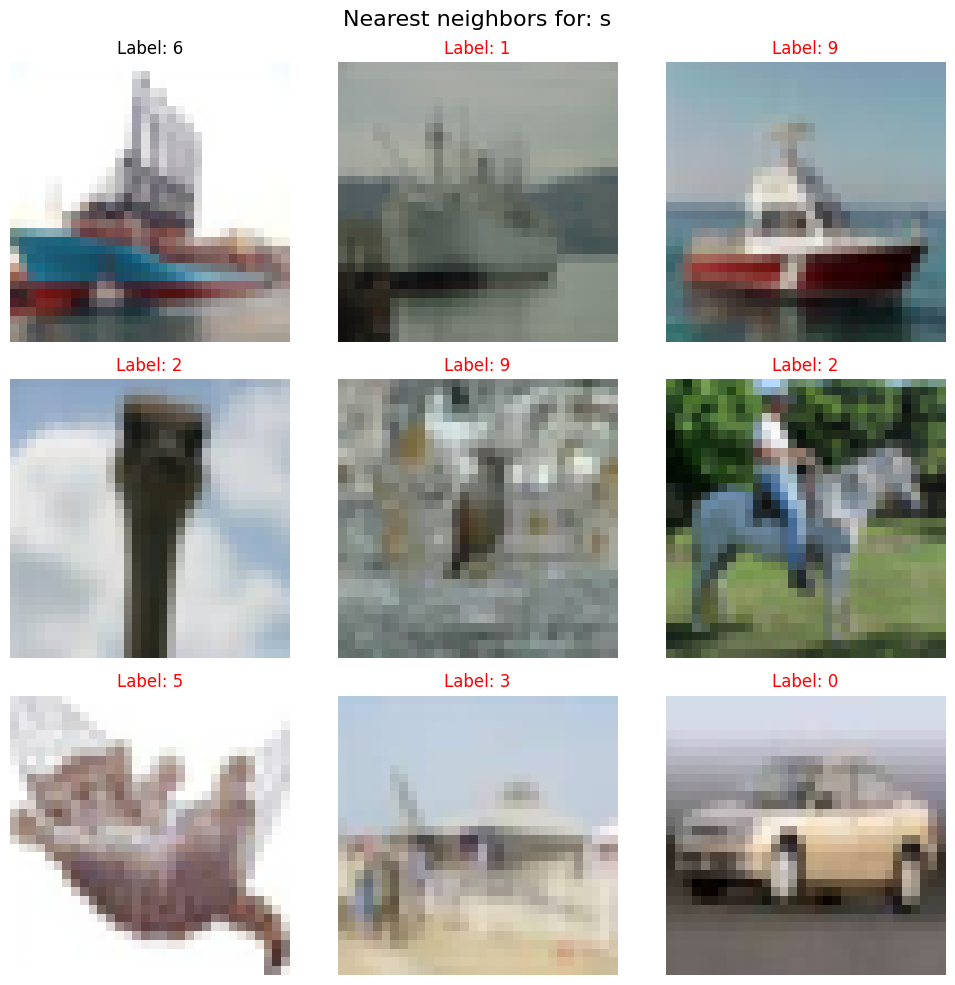

In [11]:
eval_KNNplot(pipe_data_test,embedding_model=model,samples=1,device="cuda")

# Test Lightly


In [ ]:
 from lightly.transforms import SimCLRTransform,FastSiamTransform,VICRegTransform
import glob
from PIL import Image
import lightly
from torchvision.transforms import ToPILImage
import torch

from lightly.transforms.multi_view_transform import MultiViewTransform
from lightly.data import ImageCollateFunction, LightlyDataset, collate
from lightly.data.multi_view_collate import  MultiViewCollate
from lightly.data.collate import BaseCollateFunction
from lightly.utils.debug import plot_augmented_images

input_size=32
# let's get all jpg filenames from a folder
glob_to_data = r"C:\Users\isxzl\OneDrive\Code\Datasets\cifar10\train\airplane/*.png"
fnames = glob.glob(glob_to_data)

image = torch.randn(32, 3, input_size, input_size)
input_images = [Image.open(fname) for fname in fnames[:2]]
pil_image = ToPILImage()(image[0]) # Converts the first image of the batch to a PIL Image.
pil_image2 = input_images[0]
input = [(pil_image2, 0, 'my-image.png'),(pil_image, 1, 'my-image2.png')]


transf = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomCrop(input_size, padding=4),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
    ]
)
 
transform = SimCLRTransform(
    input_size=input_size,   # resize input images to 128x128 pixels
    cj_prob=0.0,      # disable color jittering
    rr_prob=0.5,      # apply random rotation by 90 degrees with 50% probability
)

transform = FastSiamTransform(
    input_size=input_size,
    gaussian_blur=0.0,
)
transform = VICRegTransform(
    input_size=input_size,
    gaussian_blur=0.0,
)

mtransform = MultiViewTransform([transf, transf, transf])


mviews = mtransform(pil_image2)    #   --> n
print("===MultiViewTransform accept single Image===")
print(f"view num:{len(mviews)}")
print(mviews[0].shape)

views = transform(pil_image2)   # Accept Image
print("===lightly transform accept single Image===")
print(f"view num:{len(views)}")
print(views[0].shape)

collate_fn = SimCLRCollateFunction(     #   --> 2
    input_size=input_size,
    gaussian_blur=0.0,
)
collate_fn =BaseCollateFunction(transf)   # 1 --> 2



cviews=collate_fn(input)     # Accept batched Image List
print("===lightly collate_fn accept batched Image List===")
print(f"view num:{len(cviews[0])}")
print(cviews[0][0].shape)
print(cviews[1])
print(cviews[2])


fig = plot_augmented_images(input_images, collate_fn) 